In [20]:
import sys
import torch
from pathlib import Path
import json
from PIL import Image
import requests
from transformers import AutoProcessor, AutoModelForVision2Seq
import torch
import matplotlib.pyplot as plt
import logging
import numpy as np
import os

from src.dataloader import get_dataloader

In [21]:

def visualize_trajectory(dataloader):
    # Get dataloader in debug mode
    # Get a single batch
    batch = next(iter(dataloader))
    
    # Take the first trajectory from the batch
    trajectory_frames = batch['frames'][0]  # This is a list of tensors
    subtask = batch['subtask_name'][0]
    label = batch['label'][0]
    num_frames = batch['num_frames'][0].item()  # Convert tensor to integer
    
    # Log information about the trajectory
    print(f"\nTrajectory Information:")
    print(f"Subtask: {subtask}")
    print(f"Success: {bool(label)}")
    print(f"Number of frames: {num_frames}")
    print(f"First frame shape: {trajectory_frames[0].shape}")
    
    # Create a grid of frames
    num_cols = 4
    num_rows = (num_frames + num_cols - 1) // num_cols
    
    plt.figure(figsize=(15, 3*num_rows))
    for i in range(num_frames):
        plt.subplot(num_rows, num_cols, i + 1)
        # Convert from [C, H, W] to [H, W, C]
        frame = trajectory_frames[i].permute(1, 2, 0).numpy()
        plt.imshow(frame)
        plt.title(f"Frame {i}")
        plt.axis('off')
    
    plt.suptitle(f"Trajectory for task: {subtask}\nSuccess: {bool(label)}")
    plt.tight_layout()
    plt.show()

2024-11-14 19:15:57,345 - INFO - Creating dataset...
2024-11-14 19:15:57,347 - INFO - Initializing ManipulationDataset with 2 success paths and 2 failure paths
2024-11-14 19:15:57,347 - INFO - Processing success trajectories...
2024-11-14 19:15:57,349 - DEBUG - Processing success files: 200 files found
2024-11-14 19:15:57,478 - ERROR - Error saving debug info: 'numpy.ndarray' object has no attribute 'numpy'
2024-11-14 19:15:57,525 - INFO - Processing failure trajectories...
2024-11-14 19:15:57,526 - DEBUG - Processing failure files: 200 files found
2024-11-14 19:15:57.641130: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-11-14 19:15:57,664 - INFO - Loaded 4 total trajectories
2024-11-14 19:15:57,665 - INFO - Success trajectories: 2
2024-11-14 19:15:57,665 - INFO - Failure trajectories: 2
2024-11-14 19:15:57,665 - INFO - Creating dataloader...


Dataset length: 4

Trajectory Information:
Subtask: knock the eraser over
Success: True
Number of frames: 32
First frame shape: torch.Size([3, 512, 640])


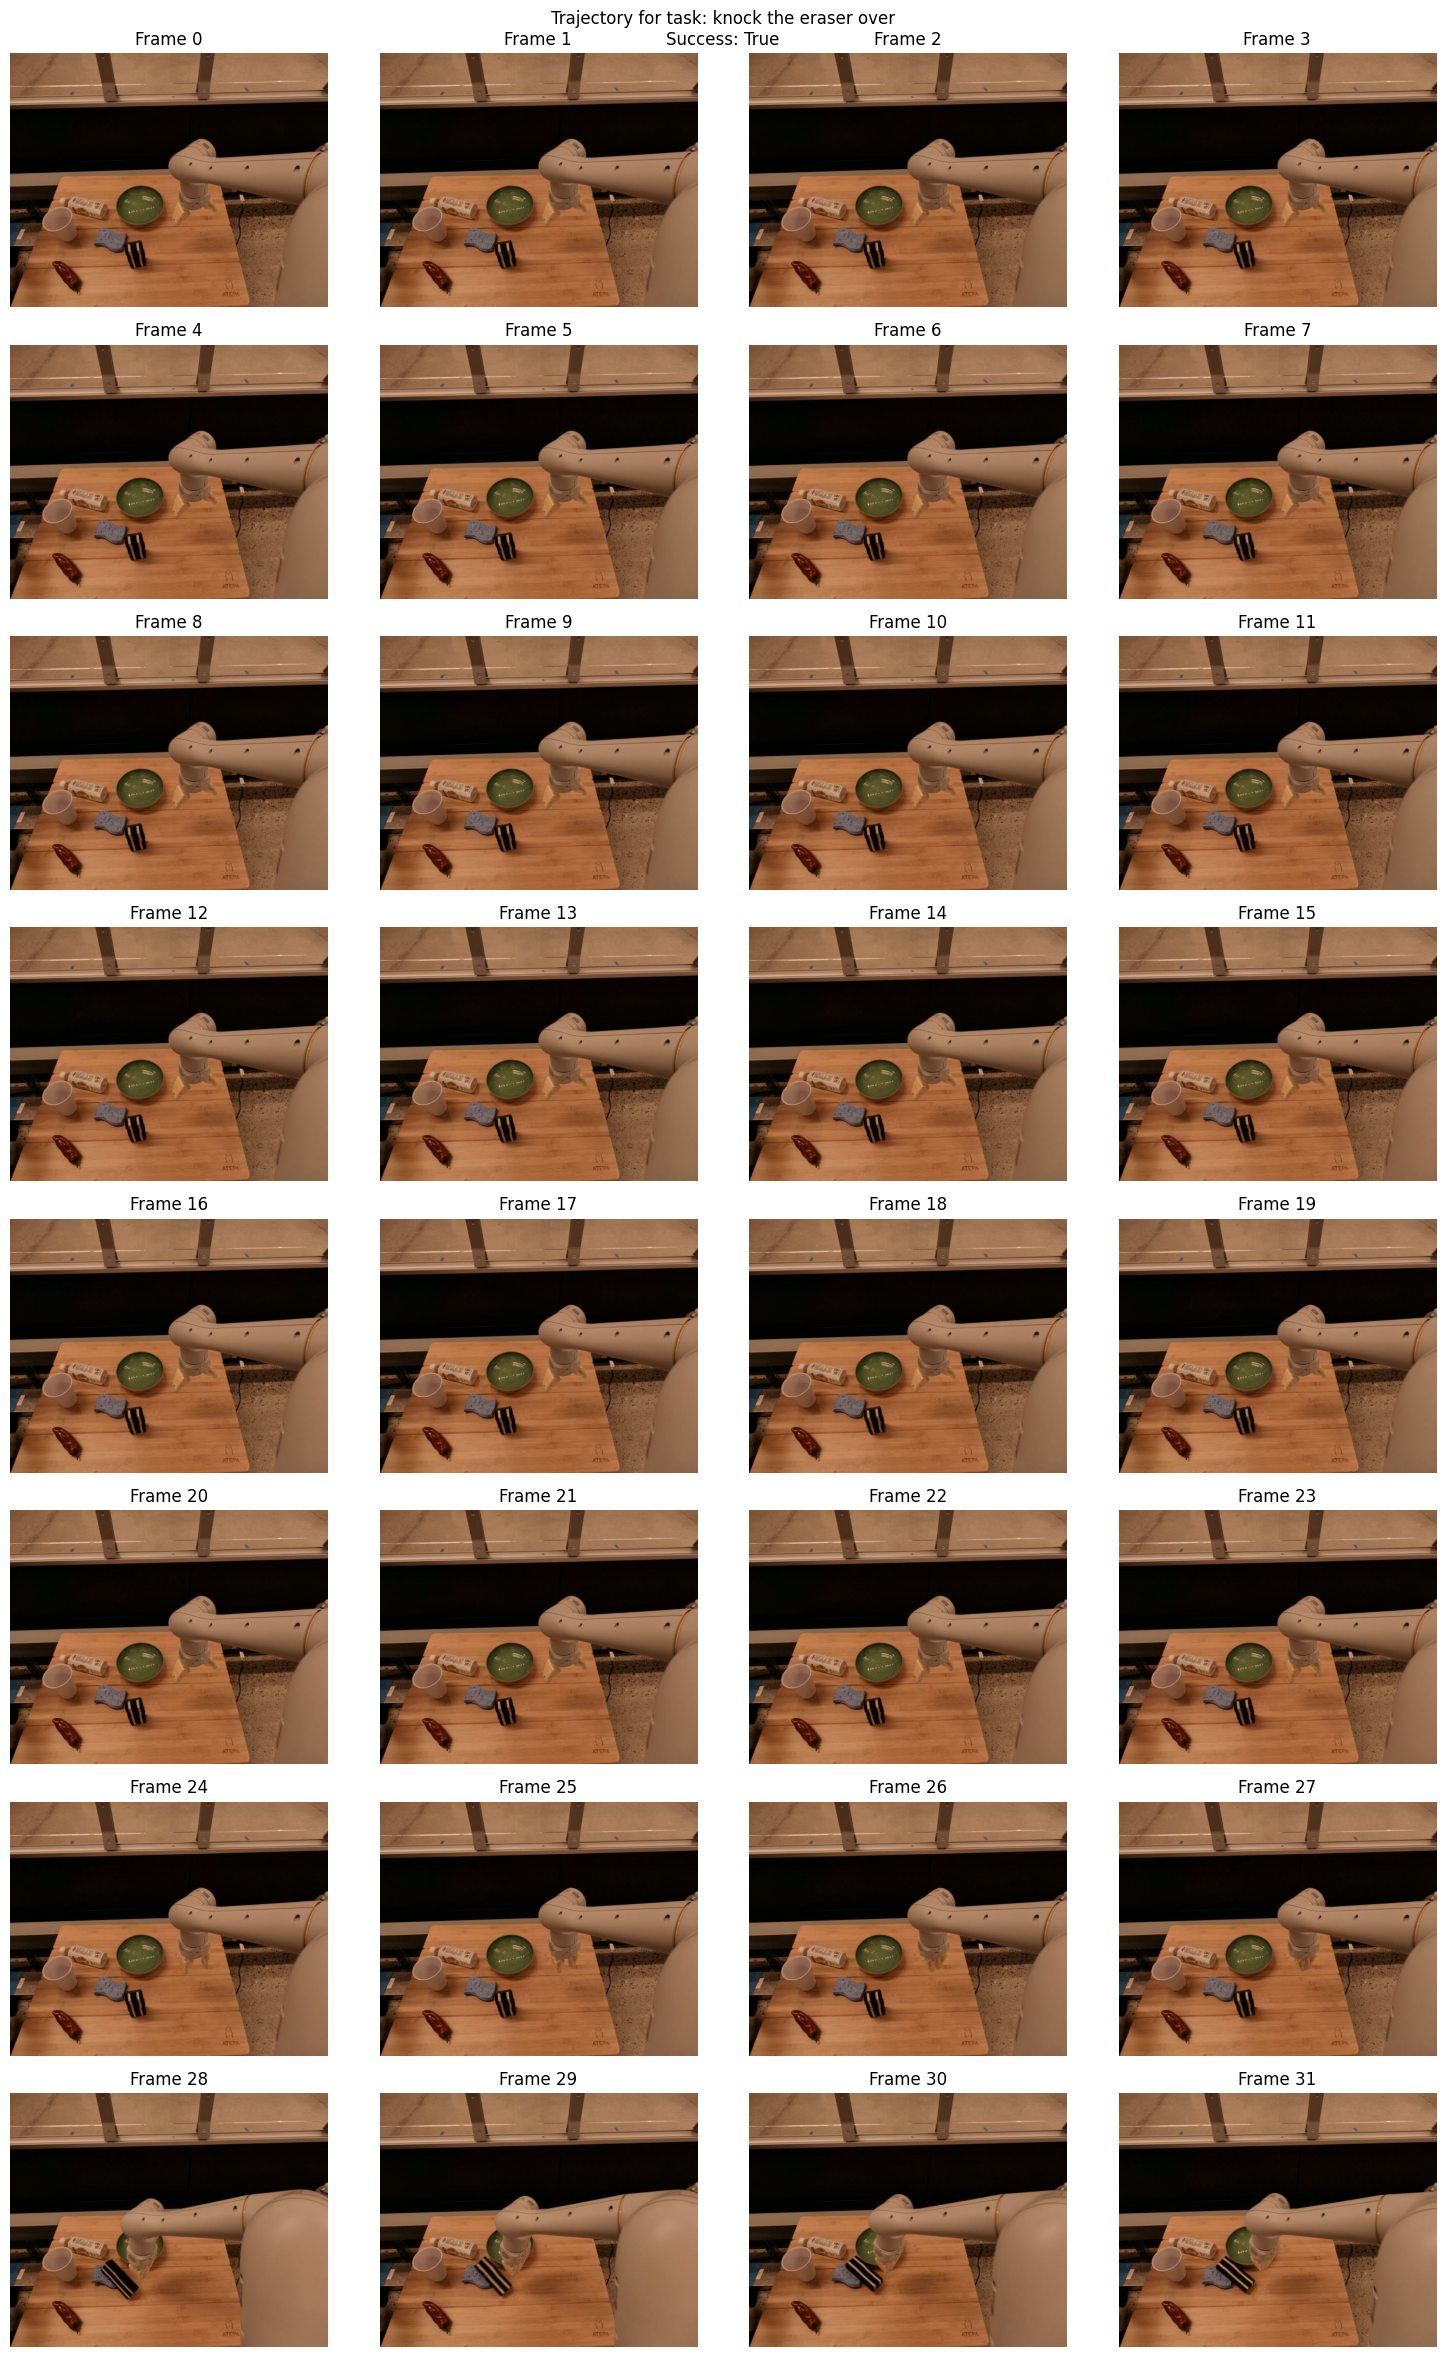

In [22]:
try:
    dataloader = get_dataloader(debug=True)
    visualize_trajectory(dataloader)
except Exception as e:
    logging.error(f"Error visualizing trajectory: {str(e)}", exc_info=True)


Trajectory Information:
Subtask: place the eraser on the white sponge
Success: False
Number of frames: 50
First frame shape: torch.Size([3, 512, 640])


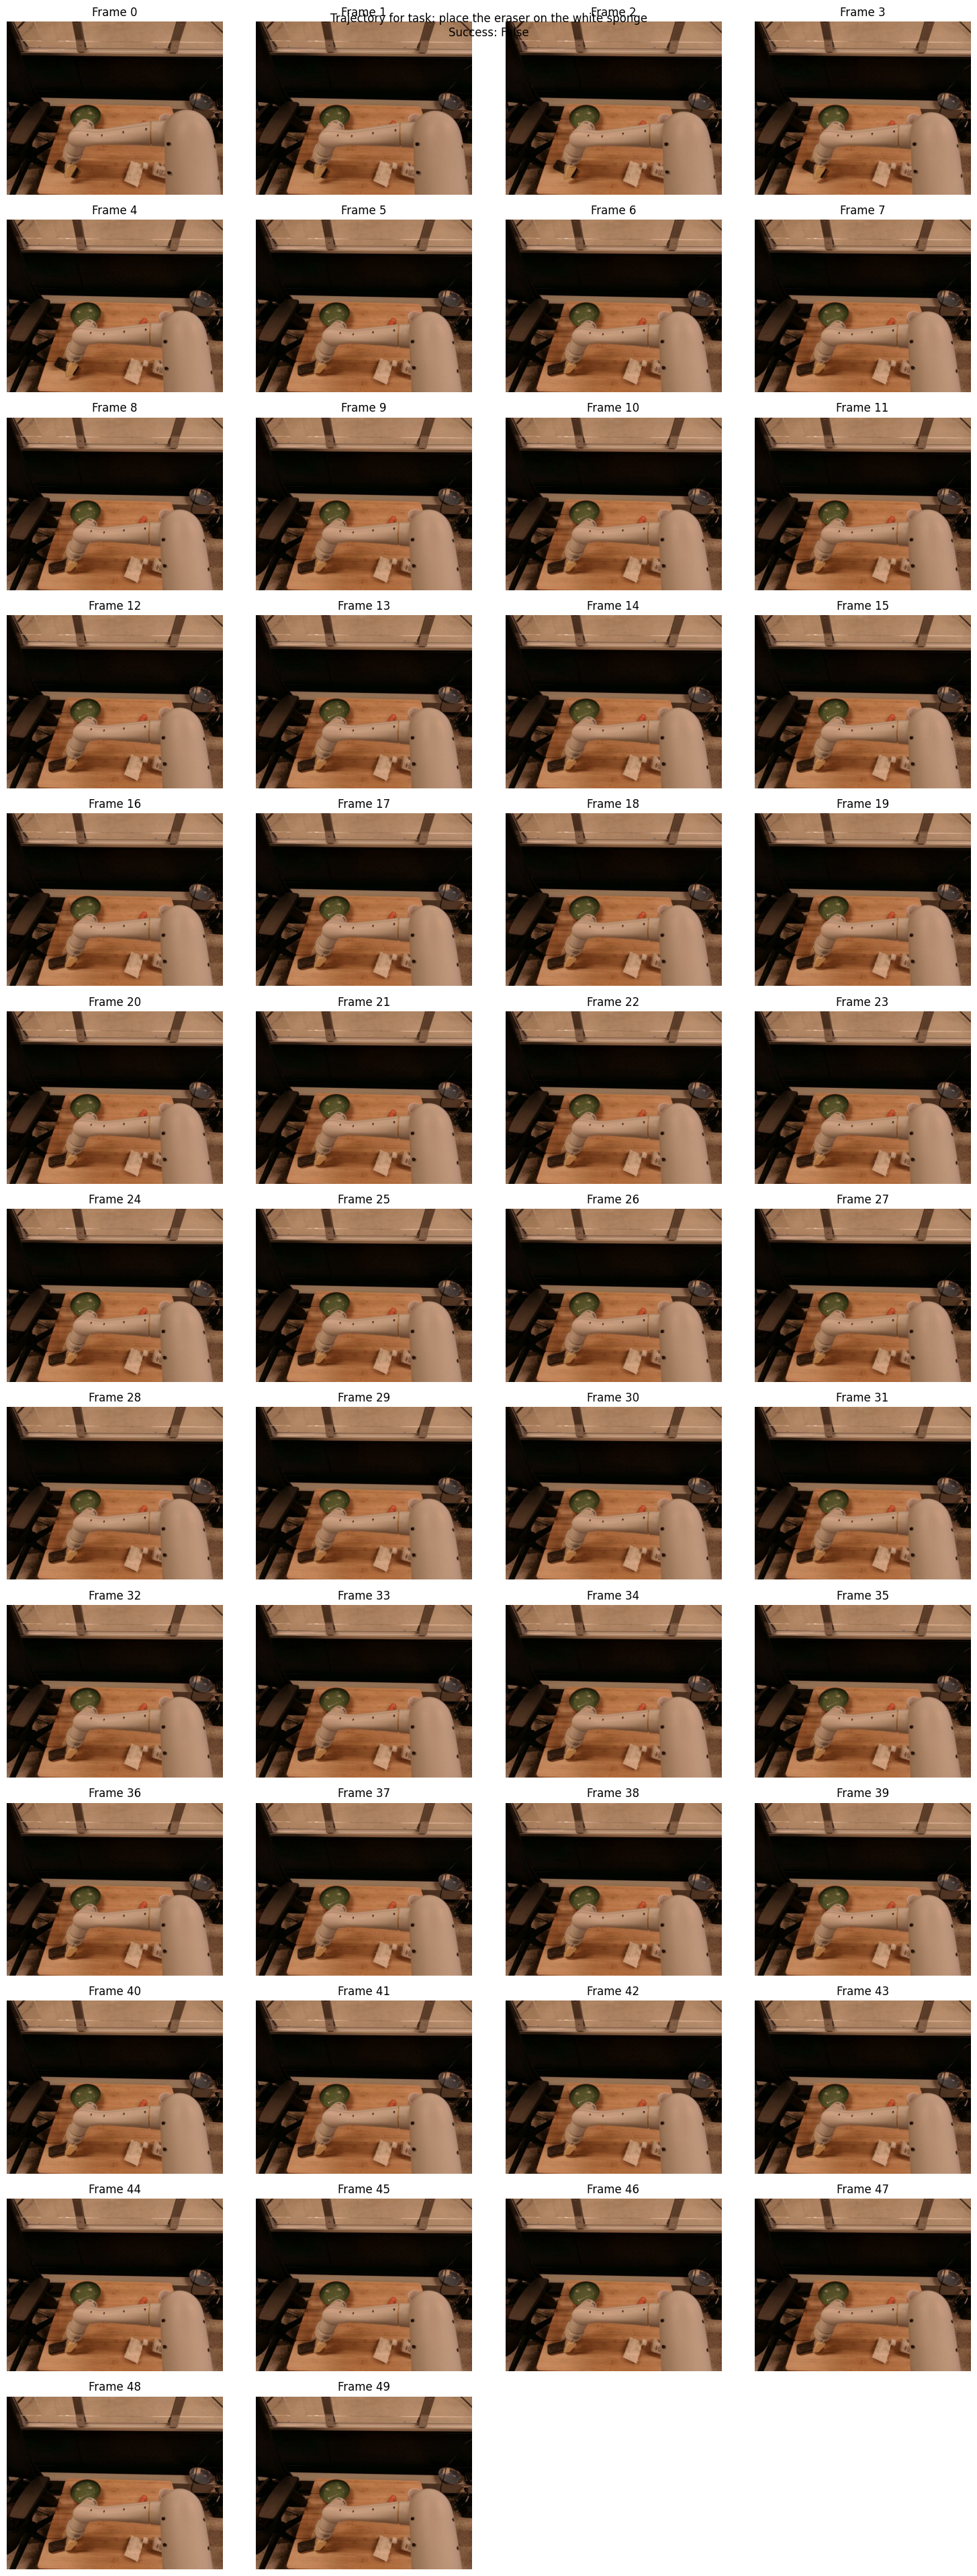

In [23]:
visualize_trajectory(dataloader)